# Group 25 Final Report

In [6]:
library(tidyverse)
library(dplyr)
library(GGally)
library(cowplot)
library(car)
library(rsample)
library(broom)
library(pROC)
library(yardstick)
library(glmnet)
library(repr)
library(gridExtra)
library(caret)
library(mltools)

## Introduction

Employee resignation is a significant concern for organizations across industries. This is because when employees decide to quit a company, it can disrupt productivity leading to financial losses (Batt, R., & Colvin, A. J. S., 2011, p.700). Understanding whether employees will leave is crucial for businesses aiming to retain top talent. The reasons behind resignations are varied and can range from personal factors, such as career advancement opportunities to organizational factors, such as inadequate financial compensation or toxic work environment (CE Noticias Financieras English, 2023). According to Adnan Iqbal (2001), “old retention strategies, such as money or financial incentives, will not be the way to go forward into the future” (p.279). As such, by examining the underlying causes, companies can employ targeted retention strategies on employees at risk of leaving to reduce turnover rate, and improve overall productivity.

To pinpoint the answer to whether an employee will leave the company, we will conduct an investigation using the dataset provided by Tawfik Elmetwally at (https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)

## Data Description:

In [7]:
# Main developer: Haoyu
# Contributor: Jay

employee <- read_csv("https://raw.githubusercontent.com/jtan29/stat-301-project/main/Employee.csv") |> 
    drop_na() |>
    mutate(PaymentTier = as.character(PaymentTier))
head(employee)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [8]:
# Main developer: Haoyu

summary(employee)

  Education          JoiningYear       City           PaymentTier       
 Length:4653        Min.   :2012   Length:4653        Length:4653       
 Class :character   1st Qu.:2013   Class :character   Class :character  
 Mode  :character   Median :2015   Mode  :character   Mode  :character  
                    Mean   :2015                                        
                    3rd Qu.:2017                                        
                    Max.   :2018                                        
      Age           Gender          EverBenched       
 Min.   :22.00   Length:4653        Length:4653       
 1st Qu.:26.00   Class :character   Class :character  
 Median :28.00   Mode  :character   Mode  :character  
 Mean   :29.39                                        
 3rd Qu.:32.00                                        
 Max.   :41.00                                        
 ExperienceInCurrentDomain   LeaveOrNot    
 Min.   :0.000             Min.   :0.0000  
 1st Qu.:2.000  

The dataset for this project was obtained from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset?resource=download.

This dataset contains information about employees in a company with 4653 observations and 9 variables.

- Education(categorical): The educational qualifications of employees, including degree, institution, and field of study.
- JoiningYear(numeric): The year each employee joined the company, indicating their length of service.
- City(categorical): The location or city where each employee is based or works.
- PaymentTier(categorical): Categorization of employees into different salary tiers.
- Age(numeric): The age of each employee, providing demographic insights.
- Gender(categorical): Gender identity of employees, promoting diversity analysis.
- EverBenched(categorical): Indicates if an employee has ever been temporarily without assigned work.
- ExperienceInCurrentDomain(numeric): The number of years of experience employees have in their current field.
- LeaveOrNot(categorical): Binary show the employee whether leave or not.
  
This dataset can be used for various HR and workforce-related analyses, including employee retention, salary structure assessments, diversity and inclusion studies, and leave pattern analyses. Researchers, data analysts, and HR professionals can gain valuable insights from this dataset.

## Question:

In this report, we are interested in **predicting** whether an employee will leave the company. Our **response variable** (variable of interest) is "LeaveOrNot" (binary: 1 = left the company, 0 = stayed), making this a classification problem. The **explanatory variables** include "Education", "JoiningYear", "City", "PaymentTier", "Age", "Gender", "EverBenched", and "Experience in Current Domain". Additionally, while constructing our model we will determine the coefficients for each variable, allowing us to observe which variables are most important to the model. These could suggest which variables affect whether an employee will leave a company. However, the main focus of our research is prediction.

These variables may affect an employee's desire to stay with a company, which makes them potentially good predictors. For example, low pay might drive employees to move to another job, and being benched may cause an employee to seek other opportunities where their skills will be utilized. 

One motivation for posing and answering this question might be to help companies identify employees that are likely to leave and their reasons for doing so, which might improve employee turnover if those employees are identified and measures developed to encourage them to stay with the company.

## Exploratory Data Analysis and Visualization

In [9]:
# Main developer: Haoyu

leave <- employee |>
    mutate(LeaveOrNot = as.character(LeaveOrNot))
head(leave)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


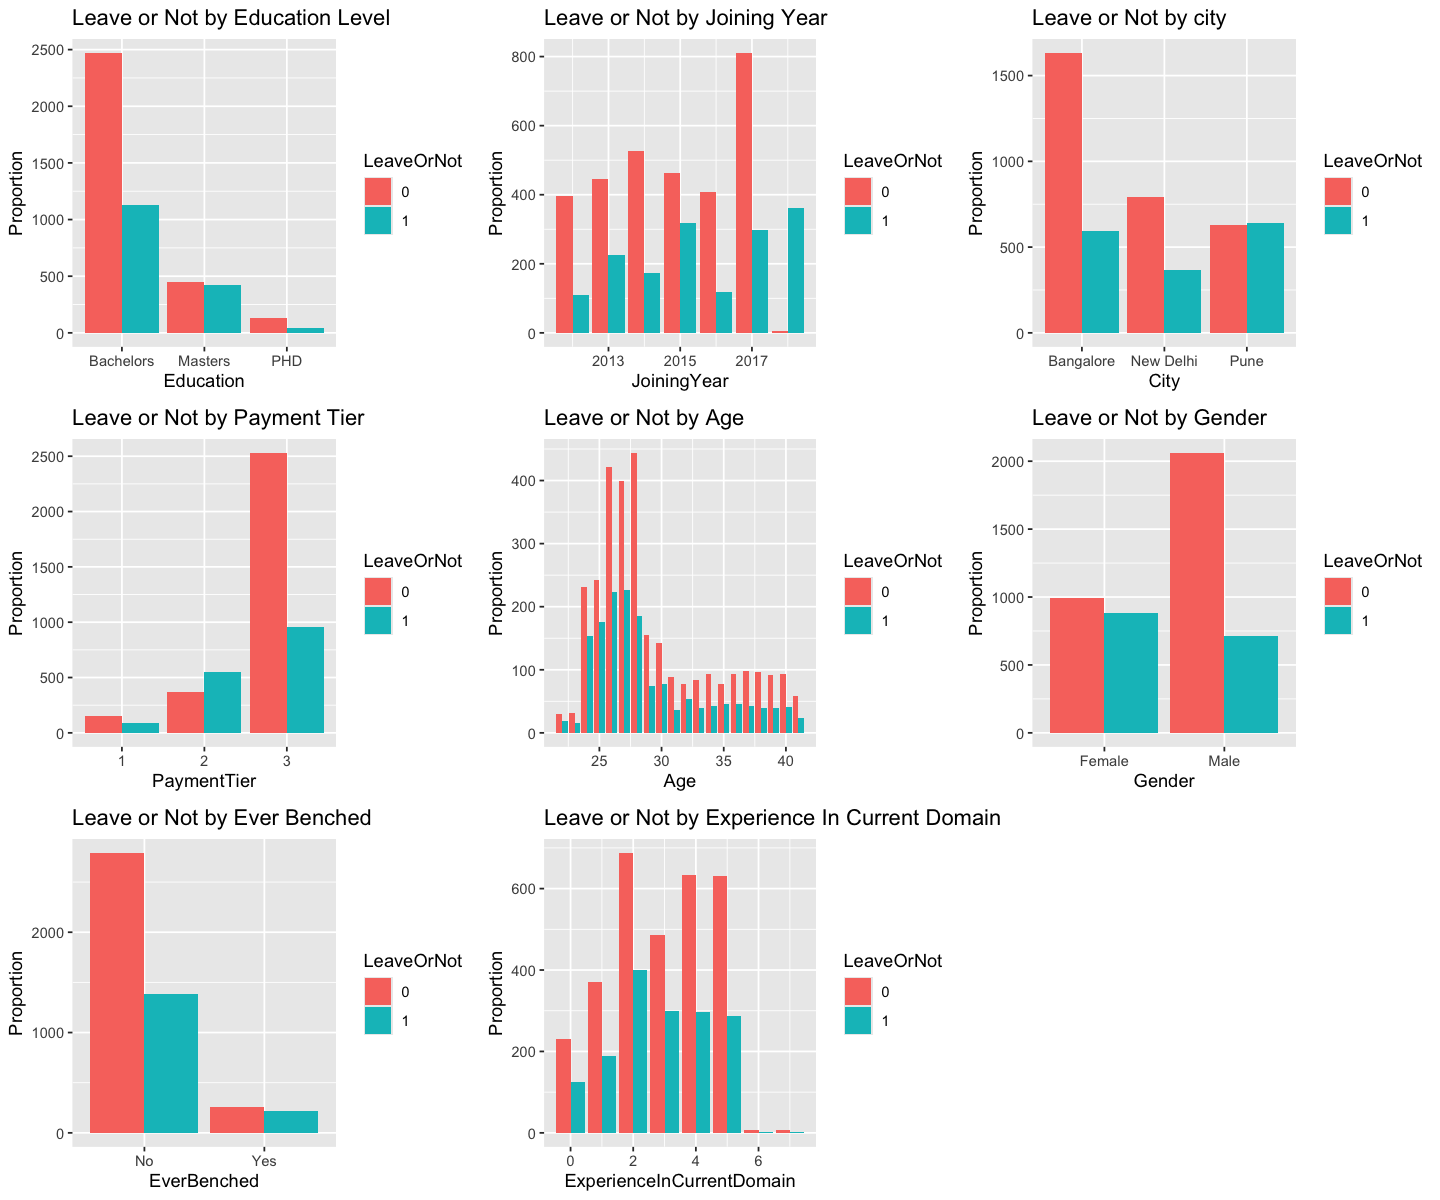

In [10]:
# Main developer: Haoyu

education_barChart <-  
    ggplot(leave, aes(x = Education, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Education Level")

joiningYear_barChart <-  
    ggplot(leave, aes(x = JoiningYear, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Joining Year")

city_barChart <-  
    ggplot(leave, aes(x = City, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by city")

paymentTier_barChart <-  
    ggplot(leave, aes(x = PaymentTier, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Payment Tier")

age_barChart <-  
    ggplot(leave, aes(x = Age, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Age")

gender_barChart <-  
    ggplot(leave, aes(x = Gender, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Gender")

everBenched_barChart <-  
    ggplot(leave, aes(x = EverBenched, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Ever Benched")

experienceInCurrentDomain_barChart <-  
    ggplot(leave, aes(x = ExperienceInCurrentDomain, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Experience In Current Domain")
# put plot together
options(repr.plot.width = 12, repr.plot.height = 10)
plot_grid(education_barChart, joiningYear_barChart, city_barChart, paymentTier_barChart, age_barChart, gender_barChart, everBenched_barChart, experienceInCurrentDomain_barChart)

- Education Level Plot: Employee education levels may influence their likelihood of leaving. For example:
Higher-educated employees (e.g., those with Master's degrees) may seek better opportunities. Employees with lower education levels may have fewer career options and stay longer. Exploring the relationship between education and leave rates can help organizations tailor retention strategies.

- Joining Year Plot: Joining year can indicate how long employees have been with the company, which may correlate with their likelihood of leaving. Employees who joined recently may be at higher risk of leaving due to poor onboarding experiences or unmet expectations. Patterns based on joining year might reflect broader organizational changes (e.g., mergers, leadership changes, or economic conditions).

- City Plot: Employee turnover can vary by location due to factors such as local job market competition, cost of living, or work culture. Identifying cities with higher leave rates can help organizations focus retention efforts on specific regions.This is particularly relevant for companies operating in multiple cities.

- Payment Tier Plot: Payment tiers likely represent employee salary levels, which are often directly tied to employee satisfaction and retention. Employees in lower payment tiers may leave in search of higher salaries, while those in higher payment tiers might leave due to career stagnation or dissatisfaction unrelated to compensation.

- Age Plot: Age is often correlated with career stage, which can influence leaving decisions: Younger employees might seek rapid career growth. Older employees may seek stability or leave due to retirement. Understanding the age distribution of employees who leave can guide retention strategies for different career stages.

- Gender Plot: Gender-based trends in leave rates can reveal workplace equity issues or unique challenges faced by men or women. For example: Women may leave due to a lack of work-life balance or unequal growth opportunities. Men may leave for higher-paying roles or dissatisfaction with career growth.

- EverBenched Plot: Employees who were benched (not actively working on projects) may feel disengaged, undervalued, or uncertain about their job security, which could lead to higher turnover rates. Understanding the correlation between being benched and leaving can help organizations improve resource management and communication with employees.

- Experience in Current Domain: Employees with less experience in their current domain may leave due to skill mismatches or feeling underqualified. Conversely, highly experienced employees may leave for better opportunities or due to a lack of challenges in their current role. Exploring this variable helps organizations understand how domain experience influences retention.


These plots are relevant because they give a visual overview of potential relationships between each variable and LeaveOrNot. Such trends are crucial for identifying patterns and developing hypotheses about factors influencing employee turnover.

## Methods & Results

To address the research question, we will construct logistic regression models with various regularization (with a $\lambda$ selected by cross validation, using AUC as a measure) and variable selection methods. Then the performance will be assessed on test data with appropriate classification metrics (ROC, accuracy, and a confusion matrix) to select the best-performing model. The performance of the best logistic regression model will then be compared to two simple methods (50/50 random guessing and predicting the most common class) to determine whether there is improvement in performance. 

Using linear models allows the model's performance to be compared to the two "baseline" techniques, while still being relatively simple. Additionally, linear regression's simplicity makes it easier to explain the predictions (directly related mathematically to the coefficients) compared to more complex models, where we might not be able to easily say why the model predicted that someone would leave. This might be important in the context of making employment decisions. Logistic regression in particular is suitable here as we are predicting `LeaveOrNot`, a binary variable.  

This model assumes that the relationship between the log-odds of the response are linear to the explanatory variables, that there is no hetereoscedacity, and that the data is independent. Also, with ordinary least-squares logistic regression, multicollinearity between the explanatory variables could be a concern, which will be addressed by looking at the VIF values for the coefficients.

One potential issue is that there might not be a linear relationship between the log-odds of the target (`LeaveOrNot`) and the chosen subset of explanatory variables. If this is the case, the model may not yield good results even if other, more complex models (like K-nearest neighbours, random forests, gradient boosted trees etc.) capable of capturing non-linear relationships could. Additionally, there are some issues with the dataset itself. Since the collection year is unknown, we cannot use the years employees have been with the company in the analysis, only the year they joined.  Finally, this binary classification model only predicts whether an employee will leave at this point in time (within a span of about a year). In practical applications an employer might be more interested in how long the employee will stay before leaving (survival analysis).

The results of four different logistic regression models can be found [here](https://github.com/HaoyuYou/Stat-301-Project/blob/70f7249a25466f6479347d6137cb9671bcdf1c4b/model_comparison.ipynb). (For brevity, only the analysis for the best performing model is included in this notebook). The results are summarized in the following table:



| Table 1. | Model Name   | Accuracy |  
|---|---|---|
| | LASSO Selection   | 0.7306590   |   
| | LASSO Model | 0.7156160  |   
| | Forward Selection |  0.7342407 |   
| | Ridge (default threshold) | 0.7320917 | 
| | Ridge (best threshold) | 0.7392550 | 
| | Stepwise selection | 	0.7328080 | 



Below, the code for the best logistic regression model out of these 6 (Ridge regression with best threshold) is provided.

### Implementation

#### Multicollinearity Checking

In [11]:
# Main developer: Haoyu

MLR_employee <- glm(formula = LeaveOrNot ~ ., 
                data = employee, 
                family = binomial)
VIF_MLR_employee <- vif(MLR_employee)

round(VIF_MLR_employee, 3)

,GVIF,Df,GVIF^(1/(2*Df))
Education,1.331,2,1.074
JoiningYear,1.071,1,1.035
City,1.541,2,1.114
PaymentTier,1.299,2,1.068
Age,1.025,1,1.013
Gender,1.104,1,1.051
EverBenched,1.012,1,1.006
ExperienceInCurrentDomain,1.023,1,1.011


- None of the variables have $GVIF^{\frac{1}{2*Df}}$ values above $2$. All values are close to $1$, indicating low multicollinearity.
- The highest GVIF is $1.423$ for the variable "City". However, the adjusted $GVIF^{\frac{1}{2*Df}}$ value for 'City' is $1.092$, which is well below the threshold of 2.


Additionally, even with potential multicollinearity, our final model using Ridge regularization would've addressed the issue. However, even without the regularization multicollinearity wouldn't have been a major concern.

#### Data Splitting

We begin by loading the dataset, adding an "ID" column unique per each row, and using the "ID" feature to split the data randomly into training and testing data, using a 70-30 split.

In [12]:
# Main developer: Jay, Haoyu, Kevin, Liya

set.seed(123)
employee_dat <- read_csv("https://raw.githubusercontent.com/jtan29/stat-301-project/main/Employee.csv")
employee_dat <- employee_dat %>%
mutate(PaymentTier = as.factor(PaymentTier))
head(employee_dat)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [13]:
# Main developer: Jay
# Contributor: Haoyu, Kevin, Liya
employee_dat$id <- 1:nrow(employee_dat) # add a new ID column

# 70% into train split
employee_train <- 
    employee_dat %>% 
    slice_sample(prop = 0.7)

# 30% into test split
employee_test <- 
    employee_dat %>% 
    anti_join(employee_train, by = "id") 

# drop the ID column
employee_train <- 
    employee_train %>% 
    select(-id)

employee_test <-
    employee_test %>%
    select(-id)

head(employee_train, 5)
head(employee_test, 5)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Masters,2017,New Delhi,2,31,Male,No,4,0
Bachelors,2013,Bangalore,3,26,Male,No,4,0
Bachelors,2013,Pune,2,24,Male,Yes,2,1
Bachelors,2012,New Delhi,1,27,Female,No,5,0
Masters,2017,Pune,2,36,Male,No,2,0


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Bachelors,2016,Bangalore,3,22,Male,No,0,0
Bachelors,2016,Bangalore,3,34,Female,No,2,1
Masters,2017,New Delhi,2,37,Male,No,2,0
Bachelors,2016,Bangalore,3,39,Male,No,2,0


We will use the training data to train the model, and later use the test data to evaluate the model's performance.

#### Cross-Validation

First, we prepare the matrices required for the `cv.glmnet` function that we will be using to perform cross-validation.

In [14]:
# Main developer: Jay
# Contributor: Haoyu, Kevin, Liya
model_matrix_X_train <- 
    model.matrix(LeaveOrNot ~ ., employee_train)
model_matrix_X_train <- model_matrix_X_train[,-1]

matrix_Y_train <- 
    as.matrix(employee_train %>% select(LeaveOrNot), ncol = 1)

model_matrix_X_test <- 
    model.matrix(LeaveOrNot ~ ., employee_test)
model_matrix_X_test <- model_matrix_X_test[,-1]

matrix_Y_test <- 
    as.matrix(employee_test %>% select(LeaveOrNot), ncol = 1)

With the matrices prepared, we use cross-validation to find the best value of $\lambda$ to maximize the performance of our model (measured by AUC).

In [15]:
# Main developer: Jay
# Contributor: Haoyu, Kevin, Liya
employee_cv_lambda_ridge <- 
  cv.glmnet(
       x = model_matrix_X_train, 
       y = matrix_Y_train,
       alpha = 0,
       family = "binomial",
       type.measure = "auc",
       nfolds = 10)

employee_cv_lambda_ridge


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 10, alpha = 0, family = "binomial") 

Measure: AUC 

    Lambda Index Measure      SE Nonzero
min   0.01   100  0.7329 0.01084      11
1se 114.23     2  0.7241 0.01103      11

Let's also take a quick look at the coefficients of this model.

In [16]:
# Main developer: Jay, Haoyu
# Contributor: Kevin, Liya
employee_ridge_max_AUC <- 
  glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 0,
  family = "binomial",
  lambda = employee_cv_lambda_ridge$lambda.min
)

coef(employee_ridge_max_AUC)

12 x 1 sparse Matrix of class "dgCMatrix"
                                     s0
(Intercept)               -345.37702902
EducationMasters             0.60793819
EducationPHD                -0.09746346
JoiningYear                  0.17169003
CityNew Delhi               -0.37314818
CityPune                     0.54348086
PaymentTier2                 0.43524889
PaymentTier3                -0.31591244
Age                         -0.02432956
GenderMale                  -0.77518185
EverBenchedYes               0.49571818
ExperienceInCurrentDomain   -0.06432078

Since Ridge regularization does not shrink coefficients to zero, this didn't perform variable selection. However, some of the coefficients are close to zero -- particularly `Age`, `EducationPHD`, and `ExperienceInCurrentDomain`. Also, we can see that this model gives the most consideration to `Gender`, `EducationMasters`, and `EverBenched`. It also gives some weight to the `City` and `PaymentTier`. 

#### Performance Assessment

With the model trained, we can look at the predictions and assess the performance on training data.

In [17]:
# Main developer: Jay

employee_class <- 
  predict(employee_ridge_max_AUC, model_matrix_X_train, type = "response") %>% round(0)
head(employee_class, 5)

,s0
1,0
2,0
3,1
4,0
5,1


In [18]:
# Main developer: Jay

employee_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(employee_class),
    reference = as.factor(employee_train$LeaveOrNot),
    positive = "1"
)
print("Fig. 1")
employee_confusion_matrix

[1] "Fig. 1"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1911  678
         1  213  455
                                          
               Accuracy : 0.7264          
                 95% CI : (0.7108, 0.7417)
    No Information Rate : 0.6521          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3332          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4016          
            Specificity : 0.8997          
         Pos Pred Value : 0.6811          
         Neg Pred Value : 0.7381          
             Prevalence : 0.3479          
         Detection Rate : 0.1397          
   Detection Prevalence : 0.2051          
      Balanced Accuracy : 0.6507          
                                          
       'Positive' Class : 1               
                        

Using R's `roc` function, we can find the best threshold to use for our model (rather than the default).

In [19]:
# Main developer: Jay

options(repr.plot.width = 8, repr.plot.height = 8)

ROC_ridge <- roc(
  response = employee_train$LeaveOrNot,
  predictor = predict(employee_ridge_max_AUC, newx = model_matrix_X_train)[,"s0"])

best_threshold <- coords(ROC_ridge, "best")["threshold"] %>% pull()
best_threshold

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] -0.4917509

In [20]:
# Main developer: Jay

train_pred <- as.integer(predict(employee_ridge_max_AUC, newx = model_matrix_X_train, newy = matrix_Y_train) > best_threshold)

employee_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(train_pred),
    reference = as.factor(employee_train$LeaveOrNot),
    positive = "1"
)
print("Fig. 2")
employee_confusion_matrix

[1] "Fig. 2"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1680  460
         1  444  673
                                          
               Accuracy : 0.7224          
                 95% CI : (0.7067, 0.7378)
    No Information Rate : 0.6521          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.3862          
                                          
 Mcnemar's Test P-Value : 0.6179          
                                          
            Sensitivity : 0.5940          
            Specificity : 0.7910          
         Pos Pred Value : 0.6025          
         Neg Pred Value : 0.7850          
             Prevalence : 0.3479          
         Detection Rate : 0.2066          
   Detection Prevalence : 0.3430          
      Balanced Accuracy : 0.6925          
                                          
       'Positive' Class : 1               
                        

On the training data, we observe a small improvement -- but the primary effect is better balancing between the two types of errors, whereas without the adjusted threshold there was a tendency to make Type II errors. Next, we'll look at the performance on test data.

In [21]:
# Main developer: Jay

test_pred <- as.integer(predict(employee_ridge_max_AUC, newx = model_matrix_X_test, newy = matrix_Y_test) > best_threshold)

employee_confusion_matrix_adj <- 
    confusionMatrix(
    data = as.factor(test_pred),
    reference = as.factor(employee_test$LeaveOrNot),
    positive = "1"
)

print("Fig. 3")
employee_confusion_matrix_adj

[1] "Fig. 3"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 736 177
         1 193 290
                                        
               Accuracy : 0.735         
                 95% CI : (0.711, 0.758)
    No Information Rate : 0.6655        
    P-Value [Acc > NIR] : 1.206e-08     
                                        
                  Kappa : 0.4097        
                                        
 Mcnemar's Test P-Value : 0.4355        
                                        
            Sensitivity : 0.6210        
            Specificity : 0.7922        
         Pos Pred Value : 0.6004        
         Neg Pred Value : 0.8061        
             Prevalence : 0.3345        
         Detection Rate : 0.2077        
   Detection Prevalence : 0.3460        
      Balanced Accuracy : 0.7066        
                                        
       'Positive' Class : 1             
                                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



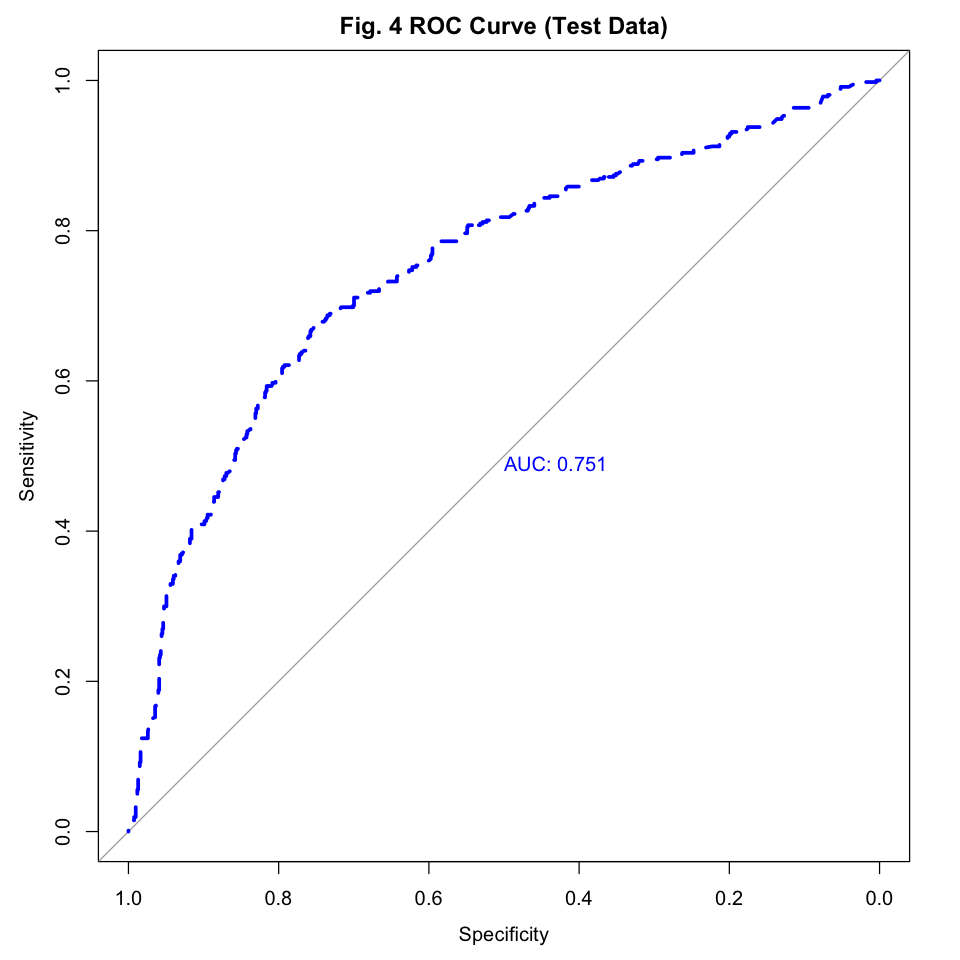

In [22]:
# Main developer: Jay, Haoyu

ROC_ridge <- roc(
  response = employee_test$LeaveOrNot,
  predictor = predict(employee_ridge_max_AUC,
                      newx = model_matrix_X_test )[,"s0"] )

plot(ROC_ridge,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "Fig. 4 ROC Curve (Test Data)"
)

### Results

The ROC curve suggests this model's overall performance (all thresholds) is better than random guessing, though even at the best threshold there is much room for improvement in the model's performance. The model's accuracy (73.93%) is also somewhat better than predicting the most common class (which would've had an accuracy of 64.97% because the dataset is unbalanced), though it is prone to making somewhat more Type II errors. As initially expected, with this relatively simple linear model we have already shown that we can construct models better than the "baseline" for this dataset. While not directly relevant to the conclusion, it is a little interesting that the test accuracy was actually *higher* than the training accuracy. The model, then, is unlikely to be overfit.

<br><br>

## Discussion

The logistic regression model developed to predict whether an employee will leave the company or not has demonstrated a reasonable level of performance, achieving an accuracy of 73.93% on the test data, with a balanced accuracy of 69.71%. This suggests that the model has a significant ability to distinguish between employees who are likely to leave and those who are likely to stay. The key predictors identified through the model include:Education,Joining Year,City,Payment Tier,Age,Gender,Ever Benched and Experience in Current Domain.

Some of the results were expected in employee retention in this research. For example, it makes sense that employees with higher educational qualifications may have more career options and therefore a higher likelihood of leaving if they are dissatisfied with their current role. Another case is where employees with low payment tiers are more likely to turnover which supports past studies on this topic. 

Logistic regression assumes a linear relationship between the predictors and the log-odds of leaving. If the actual relationship is non-linear, this could limit the model's predictive ability.

Now that we have established that a meaningful predictor can be constructed for this classification problem, future research might be concerned with the related survival analysis problem (i.e., whether a model such as the Kaplan-Meier model can be built that predicts how long an employee will stay at the company, based on similar data). However, although we were able to construct a predictor that performed better than just randomly guessing or predicting the most common class, the best accuracy we achieved (73.93%) could still be improved, and might be impaired by the limited data available. Future research could include additional variables readily available to most HR departments such as work environment wellness, potentially improving model performance.

<br><br>

## References

(August 10, 2023 Thursday). These are the top 4 reasons why employees quit their jobs. CE Noticias Financieras English.

Batt, R., & Colvin, A. J. S. (2011). An Employment Systems Approach To Turnover: Human Resources Practices, Quits, Dismissals, And Performance. The Academy of Management Journal, 54(4), 695–717. 

Adnan Iqbal. (2001). Employee Turnover: Causes, Consequences and Retention Strategies in the Saudi Organizations. The Business Review Journal, 275–281. 